In [53]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [54]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf

In [55]:
# sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [56]:
#tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [57]:
# image
from PIL import Image

# folder
import os
import glob

In [58]:
# visu
import matplotlib.pyplot as plt
plt.rc('image', cmap='gray')

In [59]:
categories = ["circle", "square", "star", "triangle"]

In [60]:
im_width = 100
im_height = 100

PATH SHAPES

In [61]:
#David path
image_path_kaggle = '/content/drive/MyDrive/MACHINE LEARNING/shapes kaggle/'
image_path_sendiri = '/content/drive/MyDrive/MACHINE LEARNING/shapes sendiri/'
image_path_real = '/content/drive/MyDrive/MACHINE LEARNING/shapes real/'

#image_path_kaggle = '/content/drive/MyDrive/Ml/shapes kaggle/'
#image_path_sendiri = '/content/drive/MyDrive/Ml/shapes sendiri/'
#image_path_real = '/content/drive/MyDrive/Ml/shapes real/'

#Ardian path
#image_path_kaggle = '/content/drive/MyDrive/MACHINE LEARNING/shapes kaggle/'
#image_path_sendiri = '/content/drive/MyDrive/MACHINE LEARNING/shapes sendiri/'
#image_path_real = '/content/drive/MyDrive/MACHINE LEARNING/shapes real/'

CONVERT BMP TO PNG

In [ ]:
# dir = '/content/drive/MyDrive/Ml/shapes real/'
# for cat in categories:
#   filelist = glob.glob('/content/drive/MyDrive/Ml/shapes real bmp/' + cat + '/*bmp')
  
#   i = 0
#   for fname in filelist:
#     x = Image.open(fname).resize((im_width,im_height))
#     x.save(f"{dir}/{cat}/" + str(i) + ".png")
#     i = i + 1

INIT

In [62]:
data_kaggle = []
target_kaggle = []

data_sendiri = []
target_sendiri = []

data_real = []
target_real = []

INPUT DATA

In [63]:
#kaggle

for cat in categories:
 filelist = glob.glob(image_path_kaggle + cat + '/*png')

 target_kaggle.extend([cat for i in filelist])

 data_kaggle.extend(
     [np.array(Image.open(fname).resize((im_width,im_height))) for fname in filelist]
 )

In [ ]:
#sendiri

for cat in categories:
 filelist = glob.glob(image_path_sendiri + cat + '/*png')

 target_sendiri.extend([cat for i in filelist])

 data_sendiri.extend(
     [np.array(Image.open(fname).resize((im_width,im_height))) for fname in filelist]
 )

In [ ]:
#real

for cat in categories:
 filelist = glob.glob(image_path_real + cat + '/*png')

 target_real.extend([cat for i in filelist])

 data_real.extend(
     [np.array(Image.open(fname).resize((im_width,im_height))) for fname in filelist]
 )

TO NUMPY ARRAY

In [65]:
data_array_kaggle = np.stack(data_kaggle, axis=0)
#data_array_sendiri = np.stack(data_sendiri, axis=0)
#data_array_real = np.stack(data_real, axis=0)

ARRAY SHAPE INFO

In [ ]:
print("kaggle: ")
print(data_array_kaggle.shape)
print(pd.DataFrame(target_kaggle).value_counts()/len(target_kaggle))
print('\n')
print("sendiri: ")
print(data_array_sendiri.shape)
print(pd.DataFrame(target_sendiri).value_counts()/len(target_sendiri))
print('\n')
print("real: ")
print(data_array_real.shape)
print(pd.DataFrame(target_real).value_counts()/len(target_real))

kaggle: 
(14979, 100, 100)
square      0.252019
star        0.251352
triangle    0.248348
circle      0.248281
dtype: float64


sendiri: 
(983, 100, 100)
square      0.255341
star        0.254323
circle      0.246185
triangle    0.244151
dtype: float64


real: 
(232, 100, 100)
triangle    0.327586
circle      0.241379
star        0.224138
square      0.206897
dtype: float64


VISU SHAPE

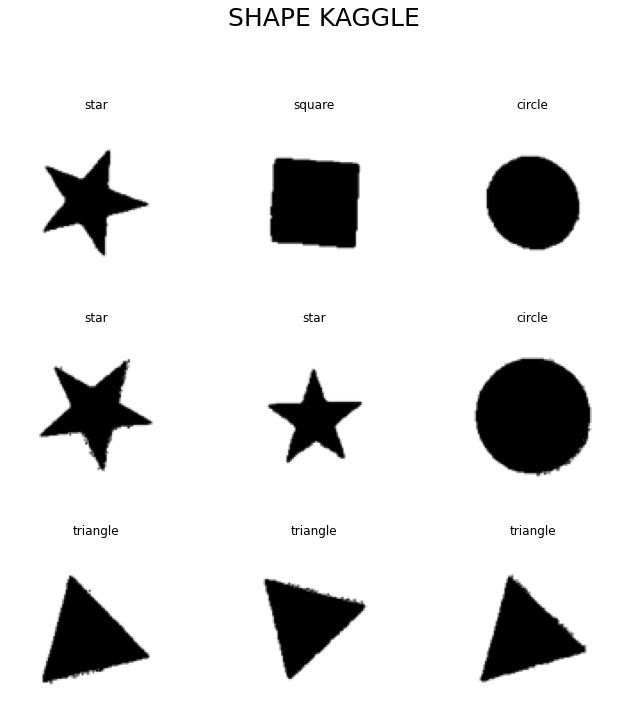

In [66]:
#kaggle

fig = plt.figure(figsize=(15,15))
gs = fig.add_gridspec(4, 4)
fig.suptitle("SHAPE KAGGLE", fontsize=25, x=0.42)

for i in range (0,3):
  for j in range (0,3):
    num_image = random.randint(0, data_array_kaggle.shape[0]-1)
    ax = fig.add_subplot(gs[i, j])
    ax.axis('off')
    ax.set_title(target_kaggle[num_image])
    ax.imshow(data_array_kaggle[num_image])

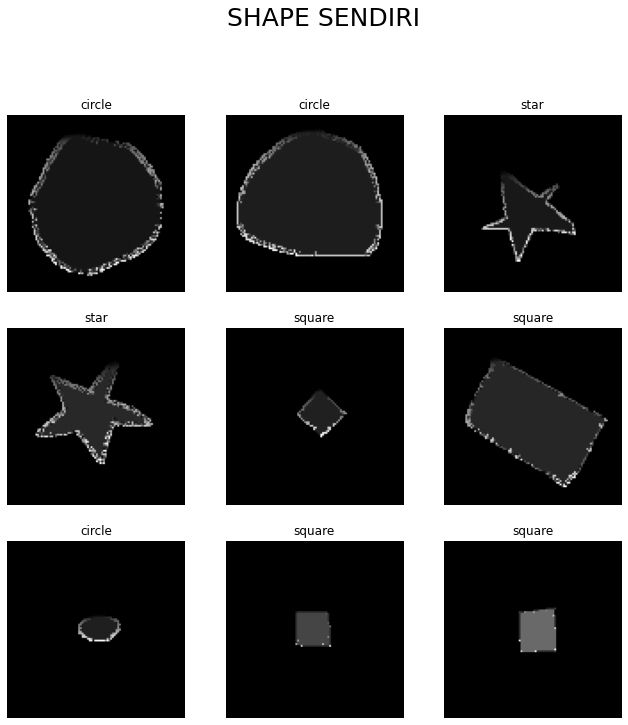

In [ ]:
#sendiri

fig = plt.figure(figsize=(15,15))
gs = fig.add_gridspec(4, 4)
fig.suptitle("SHAPE SENDIRI", fontsize=25, x=0.42)

for i in range (0,3):
  for j in range (0,3):
    num_image = random.randint(0, data_array_sendiri.shape[0]-1)
    ax = fig.add_subplot(gs[i, j])
    ax.axis('off')
    ax.set_title(target_sendiri[num_image])
    ax.imshow(data_array_sendiri[num_image])

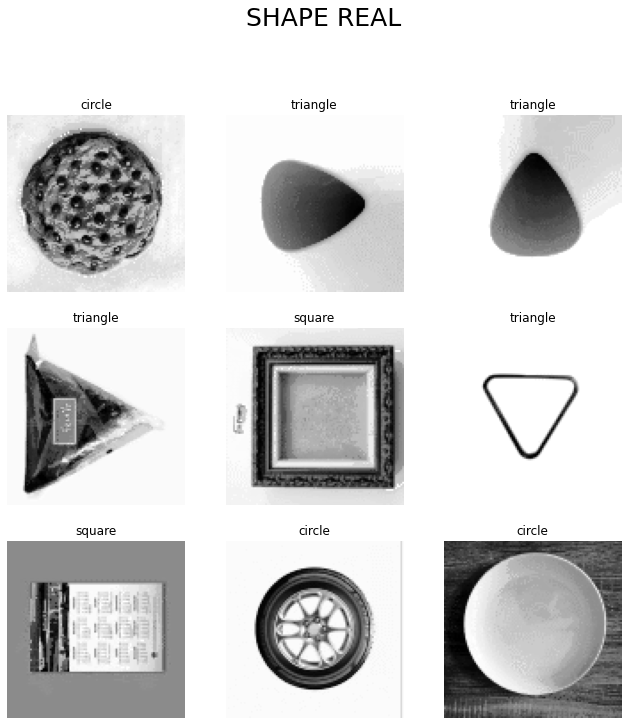

In [ ]:
#real

fig = plt.figure(figsize=(15,15))
gs = fig.add_gridspec(4, 4)
fig.suptitle("SHAPE REAL", fontsize=25, x=0.42)

for i in range (0,3):
  for j in range (0,3):
    num_image = random.randint(0, data_array_real.shape[0]-1)
    ax = fig.add_subplot(gs[i, j])
    ax.axis('off')
    ax.set_title(target_real[num_image])
    ax.imshow(data_array_real[num_image])

PERCOBAAN 1 : TRAIN (80% KAGGLE), TEST(20% KAGGLE)

In [67]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(
    data_array_kaggle, 
    np.array(target_kaggle), 
    test_size=0.2,
    stratify=target_kaggle)

In [68]:
X_train1_max = X_train1.max()
X_train1_min = X_train1.min()

print(X_train1_max)
print(X_train1_min)

255
0


NORMALISASI (UNUTK MEMUDAHKAN KONVERGENSI DARI ALGORITMA)


In [69]:
X_train1_norm = np.round((X_train1/X_train1_max), 3).copy()
X_test1_norm = np.round((X_test1/X_train1_max), 3).copy()

print(X_train1_norm.max())
print(X_train1_norm.min())

1.0
0.0


VISU NORMALISASI

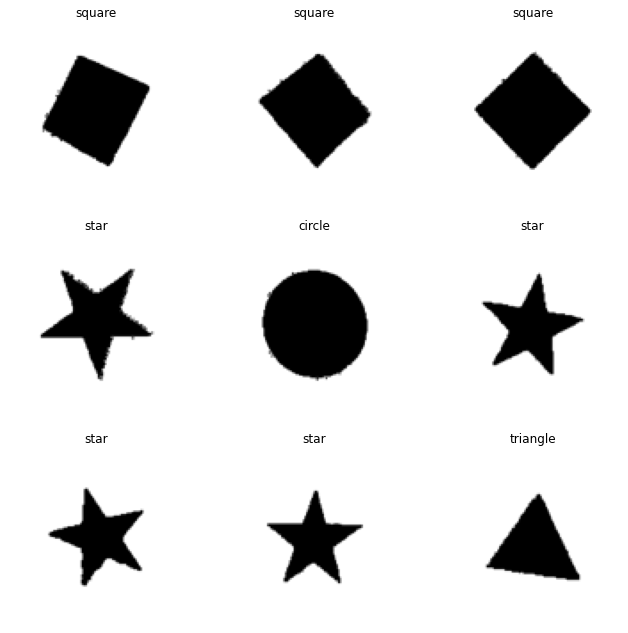

In [ ]:
fig = plt.figure(figsize=(15,15))
gs = fig.add_gridspec(4,4)

for i in range (0,3):
  for j in range (0,3):
    num_image = random.randint(0, X_train1_norm.shape[0])
    ax = fig.add_subplot(gs[i,j])
    ax.axis('off')
    ax.set_title(Y_train1[num_image])
    ax.imshow(X_train1_norm[num_image])

In [ ]:
display(np.array(Y_train1).shape)
display(np.unique(Y_train1))
display(np.array(Y_test1).shape)
display(np.unique(Y_test1))

(11983,)

array(['circle', 'square', 'star', 'triangle'], dtype='<U8')

(2996,)

array(['circle', 'square', 'star', 'triangle'], dtype='<U8')

MELABELI TARGET MENGGUNAKAN ENCODER

In [70]:
encoder = LabelEncoder().fit(Y_train1)
print(encoder.classes_)

['circle' 'square' 'star' 'triangle']


TRANSFORM: JADI MISAL DI DATA [SQUARE, SQUARE, STAR] MENJADI [1,1,2]

In [71]:
Y_train1_cat = encoder.transform(Y_train1)
Y_test1_cat = encoder.transform(Y_test1)

In [72]:
pd.DataFrame(Y_test1_cat).head()

,0
0,2
1,2
2,1
3,2
4,3


DICONVERT KE ONE HOT ENCODE AGAR BISA DIGUNAKAN SAAT TRAIN CNN

In [73]:
#oh = one hot encoded
Y_train1_oh = to_categorical(Y_train1_cat)
Y_test1_oh = to_categorical(Y_test1_cat)

In [74]:
pd.DataFrame(Y_test1_oh).head()

,0,1,2,3
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0


MENGUBAH DIMENSI IMAGE YANG AWALNYA 3 MENJADI 4 AGAR DAPAT DITERIMA OLEH ALGORITMA

In [75]:
X_train1_norm = X_train1_norm.reshape(-1, 100, 100, 1)
X_test1_norm = X_test1_norm.reshape(-1, 100, 100, 1)
print(X_train1_norm.shape)

(11983, 100, 100, 1)


CNN MODEL

In [76]:
#model cnn
def initialize_model():
    model = Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(im_height, im_width, 1), padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation="relu", padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation="relu", padding='same'))
    model.add(layers.MaxPool2D(pool_size=(3, 3)))
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(60, activation='relu'))
    model.add(layers.Dropout(rate=0.2))
    model.add(layers.Dense(4, activation='softmax'))

    return model

In [77]:
model = initialize_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 100, 100, 32)      320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 25, 25, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 25, 25, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 8, 8, 128)       

In [78]:
def compile_model(model):
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics="accuracy")
    return model

EARLY STOP DIGUNAKAN KETIKA TRAIN SUDAH BERHENTI MENINGKAT (ASUMSI MEMINIMALISIR KERUGIAN)

In [82]:
model = initialize_model()
model = compile_model(model)
#es = EarlyStopping(patience=5, monitor='val_accuracy', restore_best_weights=True)

history = model.fit(X_train1_norm, Y_train1_oh,
                    batch_size=16,
                    epochs=20,
                    validation_split=0.3)#,
                    #callbacks=[es])

Epoch 1/20
525/525 [==============================] - 172s 326ms/step - loss: 0.0789 - accuracy: 0.9684 - val_loss: 0.0012 - val_accuracy: 0.9997
Epoch 2/20
525/525 [==============================] - 170s 324ms/step - loss: 0.0043 - accuracy: 0.9985 - val_loss: 2.8269e-04 - val_accuracy: 1.0000
Epoch 3/20
525/525 [==============================] - 171s 325ms/step - loss: 7.7960e-04 - accuracy: 0.9996 - val_loss: 3.5453e-07 - val_accuracy: 1.0000
Epoch 4/20
525/525 [==============================] - 171s 325ms/step - loss: 3.7987e-05 - accuracy: 1.0000 - val_loss: 1.6993e-07 - val_accuracy: 1.0000
Epoch 5/20
525/525 [==============================] - 172s 327ms/step - loss: 8.2273e-05 - accuracy: 1.0000 - val_loss: 4.3206e-08 - val_accuracy: 1.0000
Epoch 6/20
525/525 [==============================] - 171s 326ms/step - loss: 3.0005e-05 - accuracy: 1.0000 - val_loss: 1.0325e-07 - val_accuracy: 1.0000
Epoch 7/20
525/525 [==============================] - 171s 326ms/step - loss: 2.0776e-05

(<matplotlib.axes._subplots.AxesSubplot at 0x7f9e2a44c110>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9e27222fd0>)

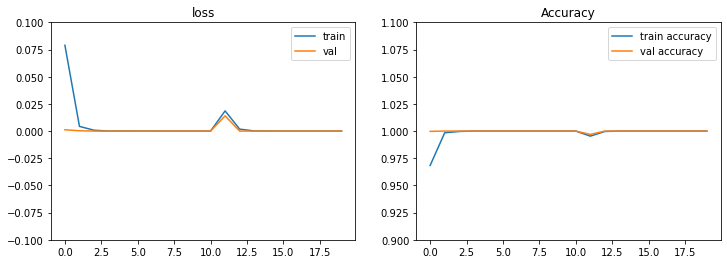

In [85]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    ax1.set_ylim(-0.1, 0.1)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.9, 1.1)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

plot_history(history, title='', axs=None, exp_name="")

In [ ]:
model.evaluate(X_test1_norm, Y_test1_oh, verbose=0)

[7.15761270839721e-05, 1.0]

In [ ]:
predictions = model.predict(X_test1_norm)

In [ ]:
prediction_round = np.round(predictions)

Text(0.42, 0.98, 'Predicted label for the displayed shapes')

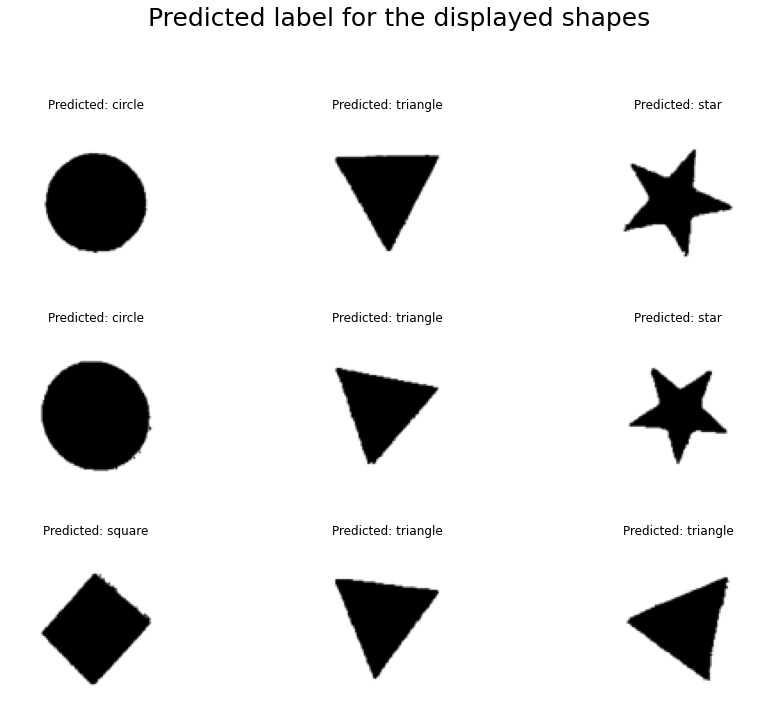

In [ ]:
fig = plt.figure(figsize=(20,15))
gs = fig.add_gridspec(4, 4)
#
for line in range(0, 3):
    for row in range(0, 3):
        num_image = random.randint(0, X_test1_norm.shape[0])
        ax = fig.add_subplot(gs[line, row])
        ax.axis('off');
        ax.set_title("Predicted: " + categories[prediction_round[num_image].tolist().index(1)])
        ax.imshow(X_test1[num_image]);
fig.suptitle("Predicted label for the displayed shapes", fontsize=25, x=0.42)

coba data kaggle sebagai train dan data sendiri sebagai test

In [ ]:
predic_trainkaggle_testsendiri = model.predict(X_test2_norm)

In [ ]:
prediction_round_trainkaggle_testsendiri = np.round(predic_trainkaggle_testsendiri)

In [ ]:
x=13

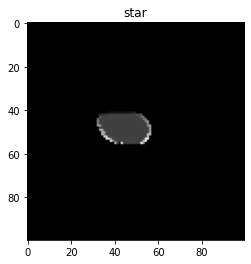

In [ ]:
plt.imshow(X_test2[x])
plt.title(categories[prediction_round_trainkaggle_testsendiri[x].tolist().index(1)])
plt.show()

PERCOBAAN 2 : TRAIN (80% SENDIRI), TEST(20% SENDIRI)

In [ ]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(
    data_array_sendiri, 
    np.array(target_sendiri), 
    test_size=0.2,
    stratify=target_sendiri)

In [ ]:
X_train2_max = X_train2.max()
X_train2_min = X_train2.min()

print(X_train2_max)
print(X_train2_min)

220
0


In [ ]:
X_train2_norm = np.round((X_train2/X_train2_max), 3).copy()
X_test2_norm = np.round((X_test2/X_train2_max), 3).copy()

print(X_train2_norm.max())
print(X_train2_norm.min())

1.0
0.0


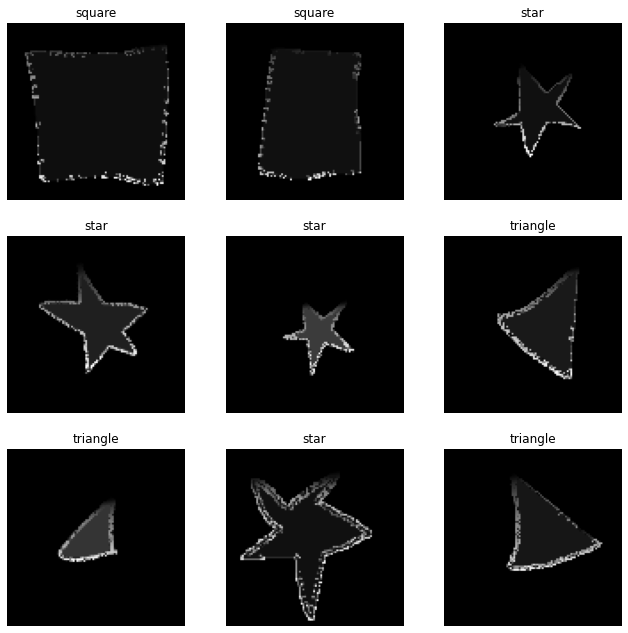

In [ ]:
fig = plt.figure(figsize=(15,15))
gs = fig.add_gridspec(4,4)

for i in range (0,3):
  for j in range (0,3):
    num_image = random.randint(0, X_train2_norm.shape[0])
    ax = fig.add_subplot(gs[i,j])
    ax.axis('off')
    ax.set_title(Y_train2[num_image])
    ax.imshow(X_train2_norm[num_image])

In [ ]:
display(np.array(Y_train2).shape)
display(np.unique(Y_train2))
display(np.array(Y_test2).shape)
display(np.unique(Y_test2))

(786,)

array(['circle', 'square', 'star', 'triangle'], dtype='<U8')

(197,)

array(['circle', 'square', 'star', 'triangle'], dtype='<U8')

In [ ]:
encoder = LabelEncoder().fit(Y_train2)
print(encoder.classes_)

['circle' 'square' 'star' 'triangle']


In [ ]:
Y_train2_cat = encoder.transform(Y_train2)
Y_test2_cat = encoder.transform(Y_test2)

In [ ]:
#oh = one hot encoded
Y_train2_oh = to_categorical(Y_train2_cat)
Y_test2_oh = to_categorical(Y_test2_cat)

In [ ]:
pd.DataFrame(Y_test2_oh).head()

,0,1,2,3
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [ ]:
X_train2_norm = X_train2_norm.reshape(-1, 100, 100, 1)
X_test2_norm = X_test2_norm.reshape(-1, 100, 100, 1)
print(X_train2_norm.shape)

(786, 100, 100, 1)


In [ ]:
#model cnn
def initialize_model():
    model = Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(im_height, im_width, 1), padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation="relu", padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation="relu", padding='same'))
    model.add(layers.MaxPool2D(pool_size=(3, 3)))
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(60, activation='relu'))
    model.add(layers.Dropout(rate=0.2))
    model.add(layers.Dense(4, activation='softmax'))

    return model

In [ ]:
model = initialize_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 128)        0

In [ ]:
def compile_model(model):
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics="accuracy")
    return model

In [ ]:
model = initialize_model()
model = compile_model(model)
#es = EarlyStopping(patience=5, monitor='val_accuracy', restore_best_weights=True)

history = model.fit(X_train2_norm, Y_train2_oh,
                    batch_size=16,
                    epochs=20,
                    validation_split=0.3)

Epoch 1/20
35/35 [==============================] - 12s 329ms/step - loss: 1.2006 - accuracy: 0.4200 - val_loss: 1.0269 - val_accuracy: 0.5508
Epoch 2/20
35/35 [==============================] - 11s 326ms/step - loss: 0.9573 - accuracy: 0.5673 - val_loss: 0.7469 - val_accuracy: 0.6525
Epoch 3/20
35/35 [==============================] - 11s 323ms/step - loss: 0.7362 - accuracy: 0.7000 - val_loss: 0.6103 - val_accuracy: 0.7288
Epoch 4/20
35/35 [==============================] - 11s 325ms/step - loss: 0.5075 - accuracy: 0.8345 - val_loss: 0.5099 - val_accuracy: 0.8008
Epoch 5/20
35/35 [==============================] - 11s 326ms/step - loss: 0.4197 - accuracy: 0.8691 - val_loss: 0.4499 - val_accuracy: 0.8686
Epoch 6/20
35/35 [==============================] - 11s 325ms/step - loss: 0.3316 - accuracy: 0.9055 - val_loss: 0.5844 - val_accuracy: 0.8390
Epoch 7/20
35/35 [==============================] - 11s 327ms/step - loss: 0.2777 - accuracy: 0.9291 - val_loss: 0.3580 - val_accuracy: 0.8814

(<matplotlib.axes._subplots.AxesSubplot at 0x7fdaaccece50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdaacb70450>)

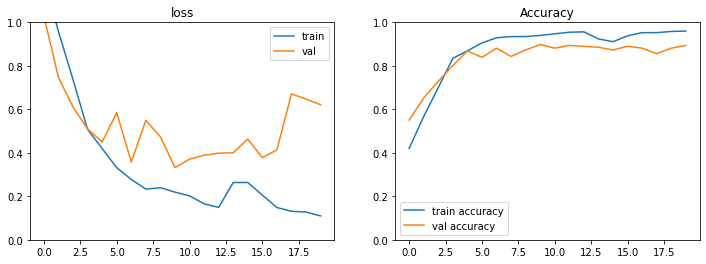

In [ ]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    ax1.set_ylim(0.0, 1.0)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.0, 1.0)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

plot_history(history, title='', axs=None, exp_name="")

In [ ]:
model = initialize_model()
model = compile_model(model)
#es = EarlyStopping(patience=5, monitor='val_accuracy', restore_best_weights=True)

history = model.fit(X_train2_norm, Y_train2_oh,
                    batch_size=16,
                    epochs=30,
                    validation_split=0.3)

Epoch 1/30
35/35 [==============================] - 13s 365ms/step - loss: 1.2927 - accuracy: 0.3273 - val_loss: 1.0738 - val_accuracy: 0.4576
Epoch 2/30
35/35 [==============================] - 12s 355ms/step - loss: 1.0444 - accuracy: 0.5182 - val_loss: 0.8077 - val_accuracy: 0.6695
Epoch 3/30
35/35 [==============================] - 12s 352ms/step - loss: 0.8525 - accuracy: 0.6455 - val_loss: 0.8526 - val_accuracy: 0.5763
Epoch 4/30
35/35 [==============================] - 12s 354ms/step - loss: 0.7088 - accuracy: 0.7291 - val_loss: 0.6260 - val_accuracy: 0.7966
Epoch 5/30
35/35 [==============================] - 12s 354ms/step - loss: 0.5786 - accuracy: 0.7891 - val_loss: 0.5567 - val_accuracy: 0.8136
Epoch 6/30
35/35 [==============================] - 13s 360ms/step - loss: 0.4376 - accuracy: 0.8636 - val_loss: 0.5863 - val_accuracy: 0.8347
Epoch 7/30
35/35 [==============================] - 12s 358ms/step - loss: 0.4620 - accuracy: 0.8327 - val_loss: 0.4905 - val_accuracy: 0.8602

(<matplotlib.axes._subplots.AxesSubplot at 0x7fdaa843bc90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdaa83f9950>)

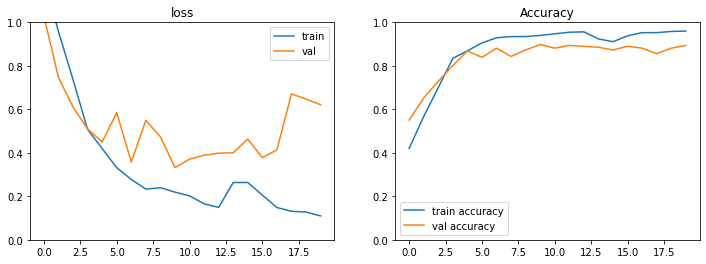

In [ ]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    ax1.set_ylim(0.0, 1.0)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.0, 1.0)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

plot_history(history, title='', axs=None, exp_name="")

In [ ]:
model = initialize_model()
model = compile_model(model)
#es = EarlyStopping(patience=5, monitor='val_accuracy', restore_best_weights=True)

history = model.fit(X_train2_norm, Y_train2_oh,
                    batch_size=16,
                    epochs=50,
                    validation_split=0.3)

Epoch 1/50
35/35 [==============================] - 12s 329ms/step - loss: 1.2221 - accuracy: 0.3873 - val_loss: 0.9962 - val_accuracy: 0.6314
Epoch 2/50
35/35 [==============================] - 11s 322ms/step - loss: 0.9505 - accuracy: 0.5836 - val_loss: 0.7192 - val_accuracy: 0.6907
Epoch 3/50
35/35 [==============================] - 11s 325ms/step - loss: 0.7463 - accuracy: 0.7000 - val_loss: 0.5792 - val_accuracy: 0.7797
Epoch 4/50
35/35 [==============================] - 11s 326ms/step - loss: 0.5915 - accuracy: 0.7800 - val_loss: 0.6936 - val_accuracy: 0.7373
Epoch 5/50
35/35 [==============================] - 11s 325ms/step - loss: 0.5241 - accuracy: 0.8073 - val_loss: 0.4853 - val_accuracy: 0.8178
Epoch 6/50
35/35 [==============================] - 11s 328ms/step - loss: 0.3812 - accuracy: 0.8800 - val_loss: 0.4442 - val_accuracy: 0.8602
Epoch 7/50
35/35 [==============================] - 11s 326ms/step - loss: 0.2963 - accuracy: 0.9000 - val_loss: 0.4253 - val_accuracy: 0.8602

(<matplotlib.axes._subplots.AxesSubplot at 0x7fdaa4942510>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdaa48e7cd0>)

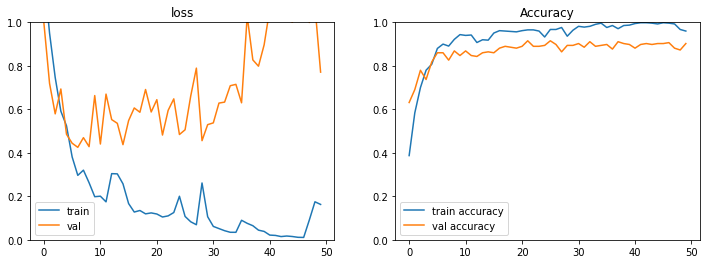

In [ ]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    ax1.set_ylim(0.0, 1.0)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.0, 1.0)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

plot_history(history, title='', axs=None, exp_name="")

In [ ]:
model.evaluate(X_test2_norm, Y_test2_oh, verbose=0)

[0.40089330077171326, 0.9441624283790588]

In [ ]:
predictions = model.predict(X_test2_norm)

In [ ]:
prediction_round = np.round(predictions)

In [ ]:
pd.DataFrame(prediction_round)

,0,1,2,3
0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
192,0.0,1.0,0.0,0.0
193,0.0,1.0,0.0,0.0
194,0.0,0.0,1.0,0.0
195,1.0,0.0,0.0,0.0


In [ ]:
num_image = []

while len(num_image) != 9:
  x = random.randint(0, X_test3_norm.shape[0]-1)
  if (x not in num_image):
    num_image.append(x)

Text(0.42, 0.98, 'Predicted label for the displayed shapes')

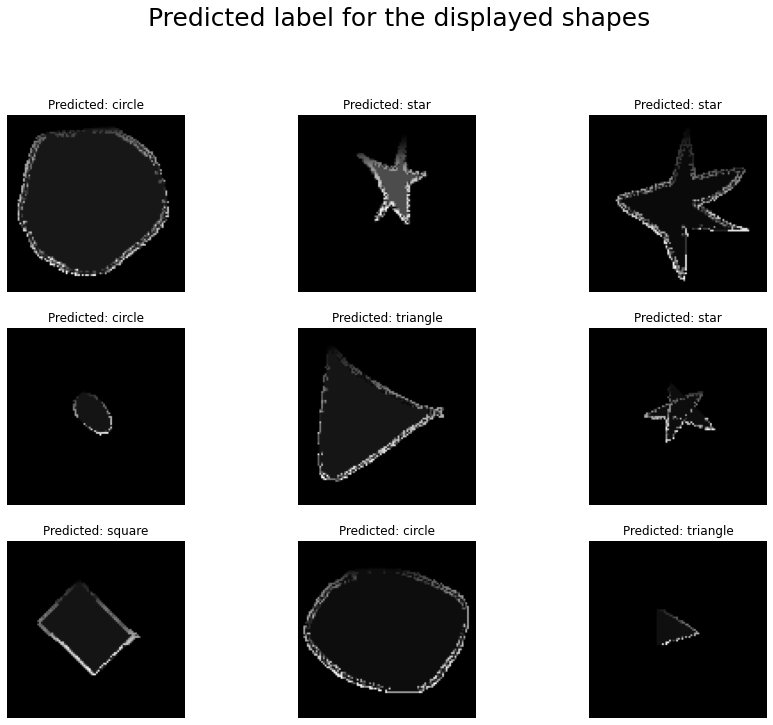

In [ ]:
fig = plt.figure(figsize=(20,15))
gs = fig.add_gridspec(4, 4)
#
i=0
for line in range(0, 3):
    for row in range(0, 3):
        ax = fig.add_subplot(gs[line, row])
        ax.axis('off');
        ax.set_title("Predicted: " + categories[prediction_round[num_image[i]].tolist().index(1)])
        ax.imshow(X_test2[num_image[i]])
        i = i + 1;
fig.suptitle("Predicted label for the displayed shapes", fontsize=25, x=0.42)

PERCOBAAN 3 : TRAIN (80% SENDIRI), TEST (20% SENDIRI)

In [ ]:
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(
    data_array_real, 
    np.array(target_real), 
    test_size=0.2,
    stratify=target_real)

In [ ]:
X_train3_max = X_train3.max()
X_train3_min = X_train3.min()

print(X_train3_max)
print(X_train3_min)

255
0


In [ ]:
X_train3_norm = np.round((X_train3/X_train3_max), 3).copy()
X_test3_norm = np.round((X_test3/X_train3_max), 3).copy()

print(X_train3_norm.max())
print(X_train3_norm.min())

1.0
0.0


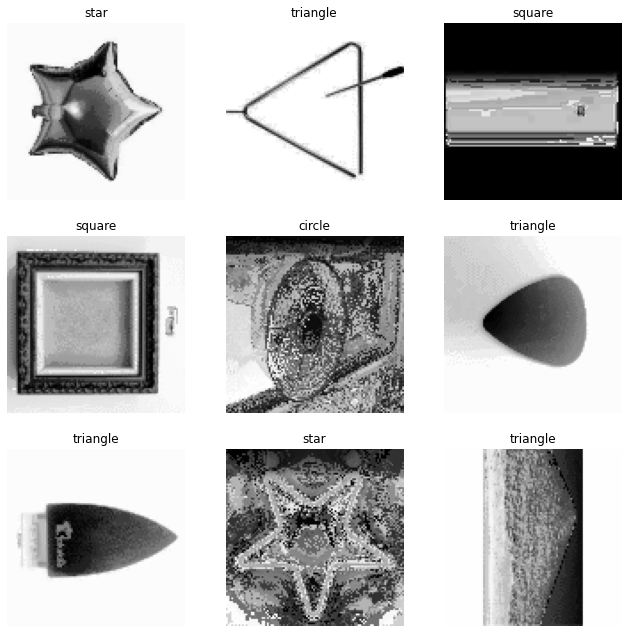

In [ ]:
fig = plt.figure(figsize=(15,15))
gs = fig.add_gridspec(4,4)

for i in range (0,3):
  for j in range (0,3):
    num_image = random.randint(0, X_train3_norm.shape[0])
    ax = fig.add_subplot(gs[i,j])
    ax.axis('off')
    ax.set_title(Y_train3[num_image])
    ax.imshow(X_train3_norm[num_image])

In [ ]:
display(np.array(Y_train3).shape)
display(np.unique(Y_train3))
display(np.array(Y_test3).shape)
display(np.unique(Y_test3))

(185,)

array(['circle', 'square', 'star', 'triangle'], dtype='<U8')

(47,)

array(['circle', 'square', 'star', 'triangle'], dtype='<U8')

In [ ]:
encoder = LabelEncoder().fit(Y_train3)
print(encoder.classes_)

['circle' 'square' 'star' 'triangle']


In [ ]:
Y_train3_cat = encoder.transform(Y_train3)
Y_test3_cat = encoder.transform(Y_test3)

In [ ]:
#oh = one hot encoded
Y_train3_oh = to_categorical(Y_train3_cat)
Y_test3_oh = to_categorical(Y_test3_cat)

In [ ]:
pd.DataFrame(Y_test3_oh).head()

,0,1,2,3
0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0


In [ ]:
X_train3_norm = X_train3_norm.reshape(-1, 100, 100, 1)
X_test3_norm = X_test3_norm.reshape(-1, 100, 100, 1)
print(X_train3_norm.shape)

(185, 100, 100, 1)


In [ ]:
#model cnn
def initialize_model():
    model = Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(im_height, im_width, 1), padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation="relu", padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation="relu", padding='same'))
    model.add(layers.MaxPool2D(pool_size=(3, 3)))
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(60, activation='relu'))
    model.add(layers.Dropout(rate=0.2))
    model.add(layers.Dense(4, activation='softmax'))

    return model

In [ ]:
model = initialize_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 100, 100, 32)      320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 25, 25, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 8, 8, 128)       

In [ ]:
def compile_model(model):
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics="accuracy")
    return model

In [ ]:
model = initialize_model()
model = compile_model(model)
#es = EarlyStopping(patience=5, monitor='val_accuracy', restore_best_weights=True)

history = model.fit(X_train3_norm, Y_train3_oh,
                    batch_size=16,
                    epochs=20,
                    validation_split=0.3,
                    )

Epoch 1/20
9/9 [==============================] - 4s 357ms/step - loss: 1.3646 - accuracy: 0.3798 - val_loss: 1.3183 - val_accuracy: 0.3929
Epoch 2/20
9/9 [==============================] - 3s 331ms/step - loss: 1.2593 - accuracy: 0.4574 - val_loss: 1.2539 - val_accuracy: 0.4464
Epoch 3/20
9/9 [==============================] - 3s 332ms/step - loss: 1.1339 - accuracy: 0.4806 - val_loss: 1.1008 - val_accuracy: 0.5179
Epoch 4/20
9/9 [==============================] - 3s 336ms/step - loss: 1.1557 - accuracy: 0.5426 - val_loss: 1.1990 - val_accuracy: 0.4464
Epoch 5/20
9/9 [==============================] - 3s 335ms/step - loss: 1.0499 - accuracy: 0.5659 - val_loss: 1.0971 - val_accuracy: 0.5179
Epoch 6/20
9/9 [==============================] - 3s 334ms/step - loss: 0.9081 - accuracy: 0.6512 - val_loss: 1.0488 - val_accuracy: 0.5893
Epoch 7/20
9/9 [==============================] - 3s 334ms/step - loss: 0.8460 - accuracy: 0.6977 - val_loss: 0.9436 - val_accuracy: 0.6429
Epoch 8/20
9/9 [====

(<matplotlib.axes._subplots.AxesSubplot at 0x7fdaa442e890>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdaa444fb90>)

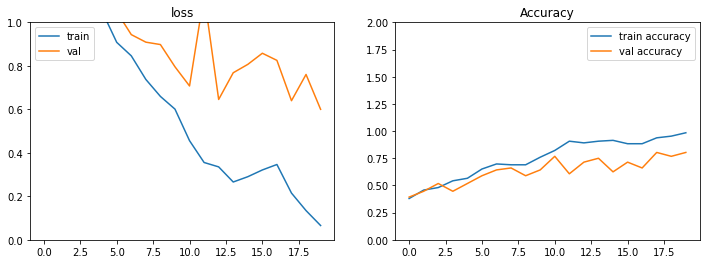

In [ ]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    ax1.set_ylim(0.0, 1.0)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.0, 2.0)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

plot_history(history, title='', axs=None, exp_name="")

In [ ]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    ax1.set_ylim(0.0, 1.0)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.0, 2.0)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

plot_history(history, title='', axs=None, exp_name="")

In [ ]:
model = initialize_model()
model = compile_model(model)
#es = EarlyStopping(patience=5, monitor='val_accuracy', restore_best_weights=True)

history = model.fit(X_train3_norm, Y_train3_oh,
                    batch_size=16,
                    epochs=40,
                    validation_split=0.3,
                    )

Epoch 1/40
9/9 [==============================] - 4s 324ms/step - loss: 1.3762 - accuracy: 0.3178 - val_loss: 1.3395 - val_accuracy: 0.3393
Epoch 2/40
9/9 [==============================] - 3s 304ms/step - loss: 1.2665 - accuracy: 0.4651 - val_loss: 1.1946 - val_accuracy: 0.5000
Epoch 3/40
9/9 [==============================] - 3s 302ms/step - loss: 1.1137 - accuracy: 0.5194 - val_loss: 1.8686 - val_accuracy: 0.2500
Epoch 4/40
9/9 [==============================] - 3s 298ms/step - loss: 1.3087 - accuracy: 0.4186 - val_loss: 1.3224 - val_accuracy: 0.3393
Epoch 5/40
9/9 [==============================] - 3s 298ms/step - loss: 1.2123 - accuracy: 0.4186 - val_loss: 1.2484 - val_accuracy: 0.4107
Epoch 6/40
9/9 [==============================] - 3s 304ms/step - loss: 1.1080 - accuracy: 0.5426 - val_loss: 1.1418 - val_accuracy: 0.4643
Epoch 7/40
9/9 [==============================] - 3s 298ms/step - loss: 0.9667 - accuracy: 0.6434 - val_loss: 1.1168 - val_accuracy: 0.5357
Epoch 8/40
9/9 [====

(<matplotlib.axes._subplots.AxesSubplot at 0x7fdaaec34890>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdaaec42950>)

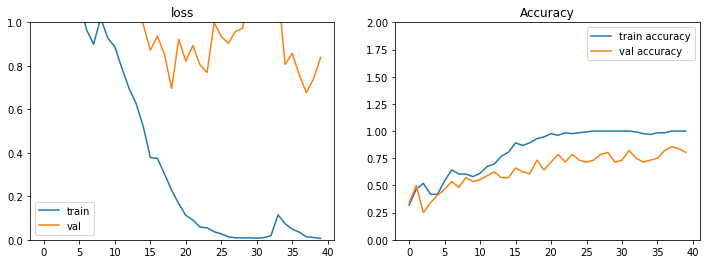

In [ ]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    ax1.set_ylim(0.0, 1.0)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.0, 2.0)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

plot_history(history, title='', axs=None, exp_name="")

In [ ]:
model = initialize_model()
model = compile_model(model)
#es = EarlyStopping(patience=5, monitor='val_accuracy', restore_best_weights=True)

history = model.fit(X_train3_norm, Y_train3_oh,
                    batch_size=16,
                    epochs=50,
                    validation_split=0.3,
                    )

Epoch 1/50
9/9 [==============================] - 3s 321ms/step - loss: 1.4166 - accuracy: 0.2791 - val_loss: 1.3683 - val_accuracy: 0.2679
Epoch 2/50
9/9 [==============================] - 3s 294ms/step - loss: 1.3527 - accuracy: 0.4341 - val_loss: 1.3085 - val_accuracy: 0.4643
Epoch 3/50
9/9 [==============================] - 3s 296ms/step - loss: 1.2529 - accuracy: 0.4574 - val_loss: 1.6792 - val_accuracy: 0.2500
Epoch 4/50
9/9 [==============================] - 3s 299ms/step - loss: 1.3046 - accuracy: 0.4341 - val_loss: 1.2820 - val_accuracy: 0.3929
Epoch 5/50
9/9 [==============================] - 3s 298ms/step - loss: 1.1979 - accuracy: 0.5271 - val_loss: 1.1354 - val_accuracy: 0.5357
Epoch 6/50
9/9 [==============================] - 3s 299ms/step - loss: 1.0336 - accuracy: 0.5891 - val_loss: 1.8948 - val_accuracy: 0.3571
Epoch 7/50
9/9 [==============================] - 3s 295ms/step - loss: 1.1439 - accuracy: 0.5426 - val_loss: 1.2128 - val_accuracy: 0.4643
Epoch 8/50
9/9 [====

(<matplotlib.axes._subplots.AxesSubplot at 0x7fdaacae5890>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdaacb8c3d0>)

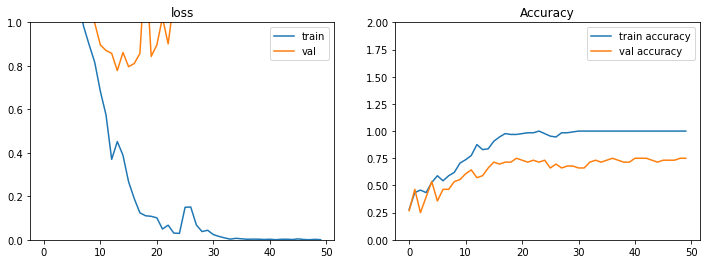

In [ ]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    ax1.set_ylim(0.0, 1.0)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.0, 2.0)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

plot_history(history, title='', axs=None, exp_name="")

In [ ]:
model.evaluate(X_test3_norm, Y_test3_oh, verbose=0)

[2.0406992435455322, 0.6559139490127563]

In [ ]:
predictions = model.predict(X_test3_norm)

In [ ]:
prediction_round = np.round(predictions)

In [ ]:
pd.DataFrame(prediction_round)

,0,1,2,3
0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
88,0.0,1.0,0.0,0.0
89,0.0,0.0,1.0,0.0
90,0.0,0.0,0.0,1.0
91,1.0,0.0,0.0,0.0


In [ ]:
num_image = []

while len(num_image) != 9:
  x = random.randint(0, X_test3_norm.shape[0]-1)
  if (x not in num_image):
    num_image.append(x)

In [ ]:
num_image

[52, 79, 63, 32, 33, 58, 53, 10, 5]

Text(0.42, 0.98, 'Predicted label for the displayed shapes')

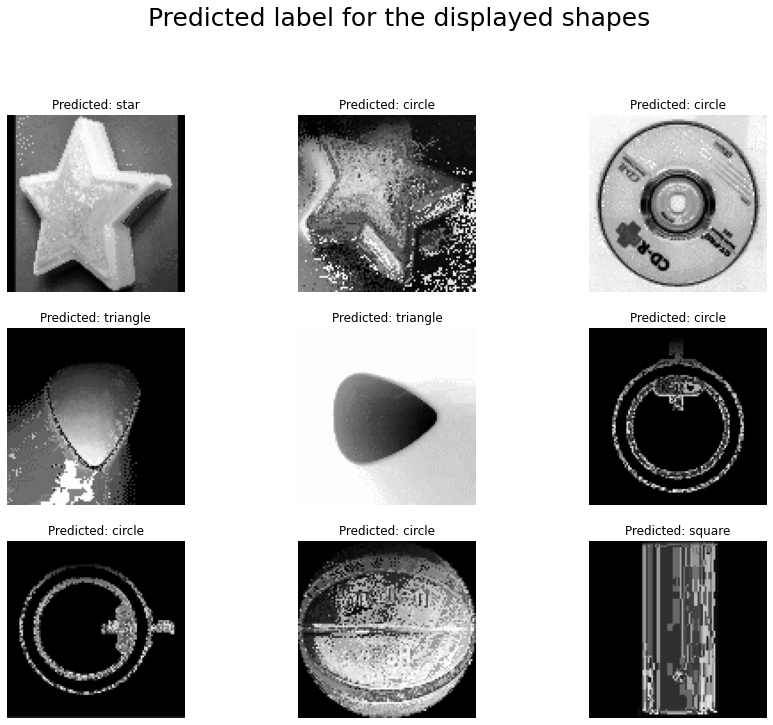

In [ ]:
fig = plt.figure(figsize=(20,15))
gs = fig.add_gridspec(4, 4)
#
i=0
for line in range(0, 3):
    for row in range(0, 3):
        ax = fig.add_subplot(gs[line, row])
        ax.axis('off');
        ax.set_title("Predicted: " + categories[prediction_round[num_image[i]].tolist().index(1)])
        ax.imshow(X_test3[num_image[i]])
        i = i+1;
fig.suptitle("Predicted label for the displayed shapes", fontsize=25, x=0.42)